### Project 3

In Project 1, we calculated information about the most expensive property, when the highest price was sold, and the average prices per WARD in Washington DC. 
In project 2, we visualized the data, and showed where the relevant data and outliers were located. In project 3, we are going to predict the correlation of number of bathrooms and bedrooms per ward.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



### First Step
Create Data Frame from DC Properties CSV data file.

In [2]:
location = "DC_Properties.csv"
df = pd.read_csv(location, 
                 usecols=["ROOMS", "BEDRM", "SALEDATE", "PRICE", "WARD", "FULLADDRESS"])
df
df.dtypes 
df.head(1000)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ROOMS,BEDRM,SALEDATE,PRICE,FULLADDRESS,WARD
0,8,4,2003-11-25 00:00:00,1095000.0,1748 SWANN STREET NW,Ward 2
1,11,5,2000-08-17 00:00:00,NaN,1746 SWANN STREET NW,Ward 2
2,9,5,2016-06-21 00:00:00,2100000.0,1744 SWANN STREET NW,Ward 2
3,8,5,2006-07-12 00:00:00,1602000.0,1742 SWANN STREET NW,Ward 2
4,11,3,NaN,NaN,1804 NEW HAMPSHIRE AVENUE NW,Ward 2
5,10,5,2010-02-26 00:00:00,1950000.0,1709 S STREET NW,Ward 2
6,5,2,2011-05-02 00:00:00,NaN,1769 SWANN STREET NW,Ward 2
7,8,4,2011-09-29 00:00:00,1050000.0,1746 1/2 T STREET NW,Ward 2
8,7,3,2018-05-03 00:00:00,1430000.0,1727 SWANN STREET NW,Ward 2
9,6,2,2008-12-05 00:00:00,NaN,1733 SWANN STREET NW,Ward 2


### First Question

Which neighborhood has the most expensive property?

To accomplish this step, we eliminated nulls from PRICE and FULLADDRESS columns.
Then we sorted by PRICE and FULLADDRESS and found the max price:

2327 GOOD HOPE COURT SE          25100000.0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


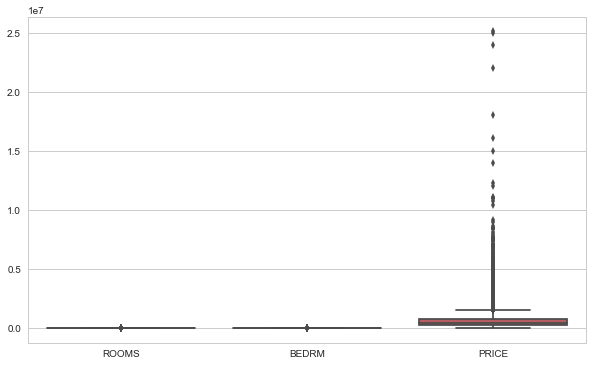

In [30]:
df_price=df[df['FULLADDRESS'].notnull() & df['PRICE'].notnull()]
sorted_by_price = df_price.groupby(['PRICE', 'FULLADDRESS'], sort=True) ['PRICE'].max()
sorted_by_price
df_price['FULLADDRESS']=df_price['FULLADDRESS'].apply(lambda x: x.split(None,1)[1])
df_price
# The violin plot was good in the sense on looking at the magnitude of the data, but 
# not good at displaying details of the data.
plt.subplots(figsize=(10,6))
sns.set(style="whitegrid")
#sns.violinplot(x='FULLADDRESS', y='PRICE', data=df_price)
sns.boxplot(data=df_price)

We are going to plot Neighborhood price information to show where the expensive homes are located.

### Second Question
When houses sold at the highest price?

To accomplish this step, we eliminated nulls from PRICE, SALEDATE, and FULLADDRESS columns.
Then we sorted by PRICE and SALEDATE and found the max price:

2018-02-15 00:00:00    25100000.0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


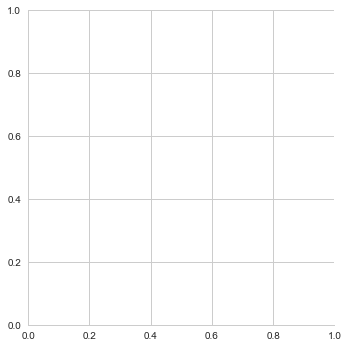

In [31]:
df_date=df[df['FULLADDRESS'].notnull() & df['PRICE'].notnull() & df['SALEDATE'].notnull()]
sorted_by_date = df_price.groupby(['PRICE','SALEDATE'], sort=True) ['PRICE'].max()
sorted_by_date
df_date
sns.lmplot(x='PRICE', y='SALEDATE', data=df_date)

### Third Question
What are the average prices per WARD in Washington DC?

For our dataset, we grouped by WARD and PRICE and then calculated the mean for each ward.

In [5]:
df.groupby('WARD')['PRICE'].mean()

WARD
Ward 1    5.738363e+05
Ward 2    1.098570e+06
Ward 3    3.077716e+06
Ward 4    4.899224e+05
Ward 5    3.952432e+05
Ward 6    5.268684e+05
Ward 7    2.339222e+05
Ward 8    2.715224e+05
Name: PRICE, dtype: float64

We are going to plot Ward price information to show where the expensive homes are located.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


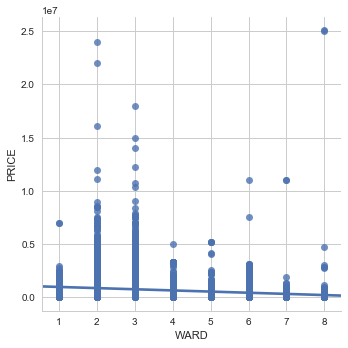

In [32]:
df_price=df[df['FULLADDRESS'].notnull() & df['PRICE'].notnull()]
df_price['WARD']=df_price['WARD'].apply(lambda x: x.replace('Ward ', '') )
df_price['WARD'] = pd.to_numeric(df_price['WARD'])
df_price.dtypes
#ward_price_df = df.groupby('WARD')['PRICE'].mean()
sns.lmplot(x='WARD', y='PRICE', data=df_price)


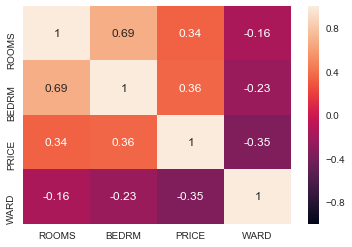

In [7]:
#show correlation of stats via heatmap
corr = df_price.corr()

sns.heatmap(corr, vmin=-1, annot=True)

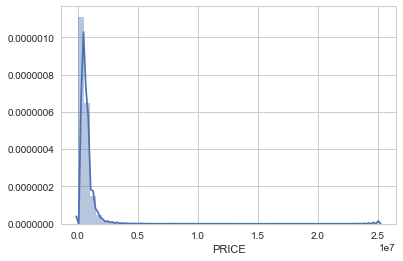

In [8]:
#create a histogram of the distribution of attack power
sns.distplot(df_price['PRICE'])

In [9]:
meangrade = df_price['PRICE'].mean()
stdgrade = df_price['PRICE'].std()

toprange = meangrade + stdgrade * 1.96
botrange = meangrade - stdgrade * 1.96

copydf = df_price.copy() #to not mess up the original df
copydf = copydf.drop(copydf[copydf['PRICE'] > toprange].index)
copydf = copydf.drop(copydf[copydf['PRICE'] < botrange].index)

copydf.head()


,ROOMS,BEDRM,SALEDATE,PRICE,FULLADDRESS,WARD
0,8,4,2003-11-25 00:00:00,1095000.0,1748 SWANN STREET NW,2
3,8,5,2006-07-12 00:00:00,1602000.0,1742 SWANN STREET NW,2
7,8,4,2011-09-29 00:00:00,1050000.0,1746 1/2 T STREET NW,2
8,7,3,2018-05-03 00:00:00,1430000.0,1727 SWANN STREET NW,2
14,5,3,2011-09-30 00:00:00,1325000.0,1721 SWANN STREET NW,2


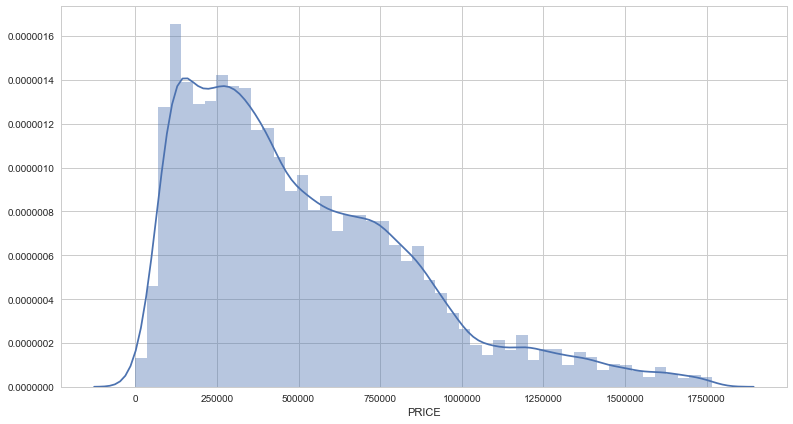

In [10]:
#create a histogram of the distribution of attack power
plt.figure(figsize=(13,7))
sns.distplot(copydf['PRICE'])

As a group, we've decided to predict the houses on each ward with the highest number of bedrooms and bathrooms.

In [44]:
df_price = df_price.drop(['FULLADDRESS'], axis=1)
df_price = df_price.drop(['SALEDATE'], axis=1)
df_price = df_price.drop(['PRICE'], axis=1)

In [52]:
df_price.isnull().sum()

ROOMS    0
BEDRM    0
WARD     0
dtype: int64

In [45]:
# extract target variable
y = df_price['WARD']

In [46]:
# copy without 'WARD' column
X = df_price.drop(['WARD'], axis=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

In [48]:
#assign decision tree function to model variable
model = tree.DecisionTreeClassifier()

In [49]:
#develop model using training data
#defining arguments in the model can help prevent overfitting
model.fit(X_train, y_train)
#df_price.dtypes

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
#run the predictions on the test data
y_predict = model.predict(X_test)
#check the accuracy of model
accuracy_score(y_test, y_predict)

0.26535221054460173

In [51]:
#look at true and false predictions
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Ward 1', 'Ward 2', "Ward 3", "Ward 4", "Ward 5", "Ward 6", "Ward 7", "Ward 8"],
    index=['True Ward 1', 'True Ward 2', "True Ward 3", "True Ward 4", "True Ward 5", "True Ward 6", "True Ward 7", "True Ward 8"]
)

,Ward 1,Ward 2,Ward 3,Ward 4,Ward 5,Ward 6,Ward 7,Ward 8
True Ward 1,20,2,112,299,317,67,41,5
True Ward 2,11,2,115,243,126,110,65,4
True Ward 3,23,4,371,735,332,57,43,3
True Ward 4,27,1,167,1054,609,56,99,2
True Ward 5,17,1,89,637,989,137,117,6
True Ward 6,13,3,103,660,612,326,209,2
True Ward 7,7,0,37,444,554,226,282,3
True Ward 8,9,1,24,284,382,71,135,11
